In [1]:
%matplotlib inline
import wfdb
import matplotlib.pyplot as plt

In [2]:
def read_ecg(file_path):
    """
    output: ecg files, get signal, annotated peaks, annotated types
    input: ecg file id
    """
    signals, fields = wfdb.rdsamp(file_path)
    annotation = wfdb.rdann(file_path, 'atr')
    ecg_sig = signals[:,0]
    ecg_type = annotation.symbol
    ecg_peak = annotation.sample
    return ecg_sig, ecg_type, ecg_peak

def plot_ecg(ecg_sig, ecg_type, ecg_peak, title='Fig: Train', npeak=10, len_sig=3000):
    """
    demo plot ecg signal with annotated peaks, annotated types
    """
    _, ax = plt.subplots()
    for i in range(0, npeak):
        ax.annotate(ecg_type[i], xy=(ecg_peak[i], -2))
    ax.plot(ecg_sig[0:len_sig])
    ax.plot(ecg_peak[0:npeak], ecg_sig[ecg_peak[0:npeak]], '*')
    ax.set_title(title)

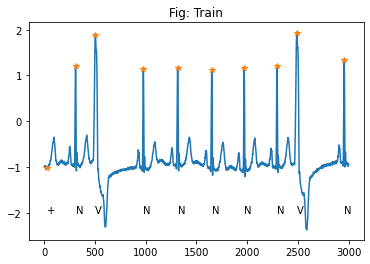

In [3]:
training_file_path = './database/train/a4'
ecg_sig, ecg_type, ecg_peak = read_ecg(training_file_path)
plot_ecg(ecg_sig, ecg_type, ecg_peak)

In [4]:
len(ecg_sig)

650000

In [5]:
len(ecg_type)

2094

In [6]:
len(ecg_peak)

2094

In [8]:
import numpy as np
mean_list = []
for idx, data in enumerate(ecg_peak):
    if(idx==0):
        mean_list.append(np.mean(ecg_sig[0:ecg_peak[idx]]))
    else:
        mean_list.append(np.mean(ecg_sig[ecg_peak[idx-1]:ecg_peak[idx]]))
    #print(mean_list)

In [ ]:
from scipy.stats import entropy

entropy_list = []
for idx, data in enumerate(ecg_peak):
    if (idx == 0):
        entropy_list.append(entropy(ecg_sig[0:ecg_peak[idx]], base = 10))
    else:
        entropy_list.append(entropy(ecg_sig[ecg_peak[idx-1]:ecg_peak[idx]]))

In [ ]:
entropy_list[0:50]

In [ ]:
print(mean_list)

In [ ]:
def cal_mean(data_array):
    mean_list = []
    for idx, data in enumerate(data_array):
        if (idx == 0):
            mean_list.append(np.mean(data_array[0:ecg_peak[idx]]))
        else:
            mean_list.append(np.mean(data_array([idx-1]:data_array[idx])))
            
        return mean_list
    
def cal_mean(data_array):
    mean_list = []
    for idx, data in enumerate(data_array):
        if (idx == 0):
            mean_list.append(np.mean(data_array[0:ecg_peak[idx]]))
        else:
            mean_list.append(np.mean(data_array([idx-1]:data_array[idx])))
            
        return mean_list
    
def cal_mean(data_array):
    mean_list = []
    for idx, data in enumerate(data_array):
        if (idx == 0):
            mean_list.append(np.mean(data_array[0:ecg_peak[idx]]))
        else:
            mean_list.append(np.mean(data_array([idx-1]:data_array[idx])))
            
        return mean_list

In [ ]:
first_matrix = ecg_sig[0:649140]

In [ ]:
sample_matrix = np.reshape(first_matrix, (2094, 310))

In [ ]:
sample_mean_matrix = np.mean(sample_matrix, axis=1)
sample_median_matrix = np.median(sample_matrix, axis=1)
sample_std_matrix = np.std(sample_matrix, axis=1)

In [ ]:
len(sample_mean_matrix)

In [ ]:
sample_matrix = np.array([sample_mean_matrix, sample_median_matrix, sample_std_matrix, ecg_type])
sample_matrix = np.transpose(sample_matrix)

In [ ]:
import pandas as pd
df = pd.DataFrame(sample_matrix, columns = ['Mean','Median','Standard Deviation', 'Target'])

df.head(10)

In [ ]:
df['Target'].replace(to_replace=['N','V','+','~'], value =[0,1,0,0], inplace = True)
df.head(10)

In [ ]:
X = df[['Mean','Median','Standard Deviation']]
df['Target'] = pd.to_numeric(df['Target'])
y = df['Target']
y[0:5]

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X= preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
X_train, X_eval, Y_train, Y_eval = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_eval.shape,  Y_eval.shape)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [ ]:
logreg_cv = GridSearchCV(lr, parameters)
logreg_cv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
yhat_logreg = logreg_cv.predict(X_eval)
yhat_logreg[0:5]

In [ ]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(Y_eval, yhat_logreg))

In [ ]:
X_test = [-1, -2, -3]
print(logreg_cv.predict(preprocessing.StandardScaler().fit([[-1, -2, -3]]).transform([[-1, -2, -3]])))

# SVM

In [ ]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, parameters)
svm_cv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
yhat_svm = svm_cv.predict(X_eval)
yhat_svm[0:5]

In [ ]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_eval, yhat_svm))

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, parameters)
knn_cv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

In [ ]:
yhat_knn = knn_cv.predict(X_eval)
yhat_knn[0:5]

In [ ]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_eval, yhat_knn))

# Performance Measure

In [ ]:
Acc_logreg = metrics.accuracy_score(Y_eval, yhat_logreg)
#Acc_svm = metrics.accuracy_score(Y_eval, yhat_svm)
Acc_knn = metrics.accuracy_score(Y_eval, yhat_knn)
Accuracy = [Acc_logreg, Acc_knn]

df_score = {'Algorithm': ['LogisticRegression', 'kNN'], 'Accuracy': Accuracy}
Perform_measure = pd.DataFrame(data = df_score, columns = ['Algorithm', 'Accuracy'], index = None)
Perform_measure

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=3, units=5, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu",units=5, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", kernel_initializer="uniform", units=1))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

In [ ]:
# Making the predictions and evaluating the model

# Predicting the Test set results
Y_pred = classifier.predict(X_eval)
Y_pred = (Y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_eval, Y_pred)

from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(Y_eval, Y_pred))

In [ ]:
Acc_logreg = metrics.accuracy_score(Y_eval, yhat_logreg)
#Acc_svm = metrics.accuracy_score(Y_test, yhat_svm)
Acc_knn = metrics.accuracy_score(Y_eval, yhat_knn)
Acc_ANN = metrics.accuracy_score(Y_eval, Y_pred)
Accuracy = [Acc_logreg, Acc_knn, Acc_ANN]

df_score = {'Algorithm': ['logreg', 'kNN', 'ANN'], 'Accuracy': Accuracy}
Perform_measure = pd.DataFrame(data = df_score, columns = ['Algorithm', 'Accuracy'], index = None)
Perform_measure